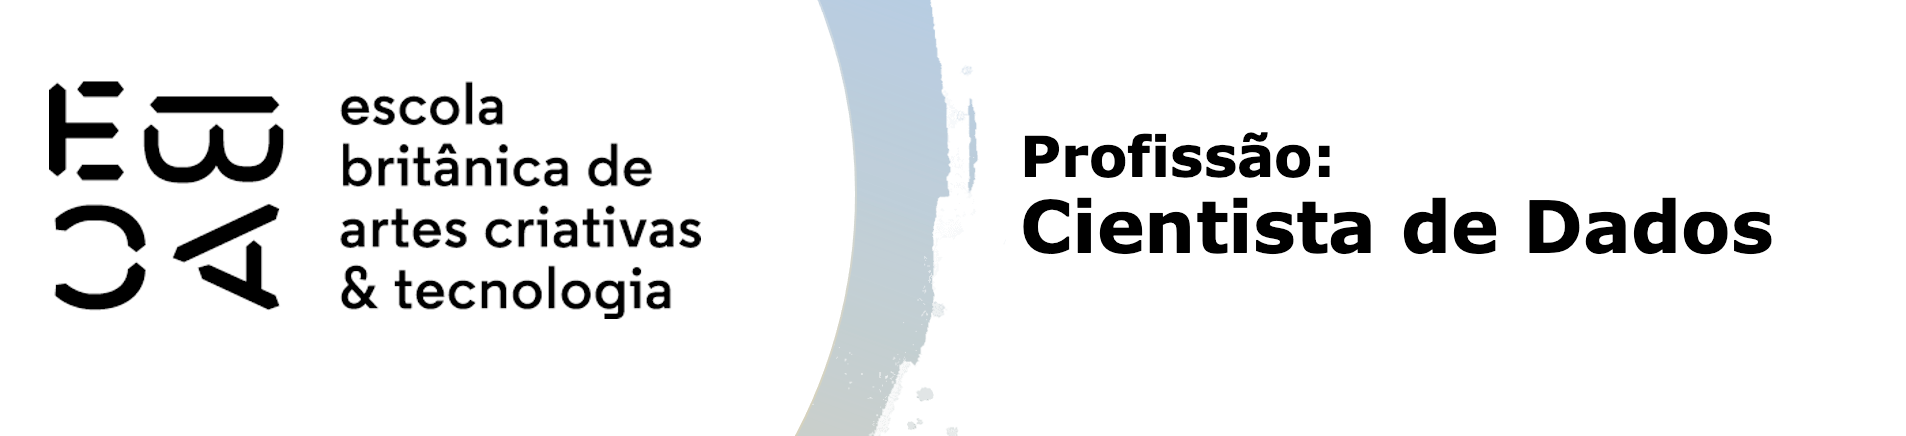

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

import scipy.stats as ss 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [106]:
df = pd.read_csv('previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [107]:
#substituir valores faltantes pela média da coluna
df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace=True)

#verificando se valores ausentes foram substituídos
df.isnull().sum()

/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_50562/3954252306.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace=True)


data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [108]:
#transformando a data (index) em coluna
df = df.reset_index()

#mudando tipo dos dados da coluna data
df['data_ref'] = pd.to_datetime(df['data_ref'])

#verificando última data
df['data_ref'].max()

Timestamp('2016-03-01 00:00:00')

In [109]:
#incluir log_renda
df['log_renda'] = np.log(df['renda'])
df.head()

,level_0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
0,0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,9.318131
1,1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,7.793508
2,2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,9.528769
3,3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,7.767196
4,4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,6.673020


In [110]:
#separar base teste
base_teste = df.loc[df['data_ref'] > '2015-11-30']

print(f''' 
    Data mínima na base_teste: {base_teste['data_ref'].min()}.
    Data máxima na base_teste: {base_teste['data_ref'].max()}.
    ''')

 
    Data mínima na base_teste: 2015-12-01 00:00:00.
    Data máxima na base_teste: 2016-03-01 00:00:00.
    


In [111]:
#separar base treino
base_treino = df.loc[df['data_ref'] <= '2015-11-30']

print(f''' 
    Data mínima na base_treino: {base_treino['data_ref'].min()}.
    Data máxima na base_treino: {base_treino['data_ref'].max()}.
    ''') 

 
    Data mínima na base_treino: 2015-01-01 00:00:00.
    Data máxima na base_treino: 2015-11-01 00:00:00.
    


In [112]:
#modelo de regressão
reg = smf.ols('''log_renda ~ tempo_emprego
                           + sexo
                           + posse_de_veiculo
                           + posse_de_imovel
                           + qtd_filhos
                           + tipo_renda
                           + educacao
                           + estado_civil
                           + tipo_residencia
                           + idade
                           + qt_pessoas_residencia''', data=base_treino).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                 1.828e+04
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        16:55:56   Log-Likelihood:            -7.2534e+05
No. Observations:              550000   AIC:                         1.451e+06
Df Residuals:                  549975   BIC:                         1.451e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.7038      0.049    156.607      0.000       7.607       7.800
sexo[T.M]                            0.1386      0.003     48.075      0.000       0.133       0.144
posse_de_veiculo[T.S]                0.0019      0.003      0.679      0.497      -0.004       0.007
posse_de_imovel[T.S]                 0.1843      0.003     68.717      0.000       0.179       0.190
tipo_renda[T.Bolsista]              -0.2181      0.055     -3.960      0.000      -0.326      -0.110
tipo_renda[T.Empresário]             0.1408      0.003     45.518      0.000       0.135       0.147
tipo_renda[T.Pensionista]           -0.2988      0.004    -67.744      0.000      -0.307      -0.290
tipo_renda[T.Servidor público]       0.1278      0.005     28.066      0.000       0.119       0.137
educacao[T.Médio]                    0.0273      0.012      2.361      0.018       0.005       0.050
educacao[T.Pós graduação]            0.1752      0.040      4.432      0.000       0.098       0.253
educacao[T.Superior completo]        0.1592      0.012     13.621      0.000       0.136       0.182
educacao[T.Superior incompleto]      0.0552      0.013      4.219      0.000       0.030       0.081
estado_civil[T.Separado]             0.1670      0.024      7.035      0.000       0.121       0.214
estado_civil[T.Solteiro]             0.1499      0.023      6.435      0.000       0.104       0.196
estado_civil[T.União]                0.0099      0.005      2.133      0.033       0.001       0.019
estado_civil[T.Viúvo]                0.1581      0.024      6.589      0.000       0.111       0.205
tipo_residencia[T.Casa]             -0.0911      0.011     -8.658      0.000      -0.112      -0.071
tipo_residencia[T.Com os pais]      -0.0591      0.012     -4.952      0.000      -0.082      -0.036
tipo_residencia[T.Comunitário]      -0.1495      0.021     -7.034      0.000      -0.191      -0.108
tipo_residencia[T.Estúdio]          -0.1343      0.018     -7.545      0.000      -0.169      -0.099
tipo_residencia[T.Governamental]    -0.0927      0.013     -7.397      0.000      -0.117      -0.068
tempo_emprego                        0.1289      0.000    599.505      0.000       0.128       0.129
qtd_filhos                          -0.1403      0.023     -6.049      0.000      -0.186      -0.095
idade                                0.0045      0.000     27.859      0.000       0.004       0.005
qt_pessoas_residencia                0.1464      0.023      6.326      0.000       0.101       0.192
==============================================================================
Omnibus:                     1188.797   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1153.817
Skew:             

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


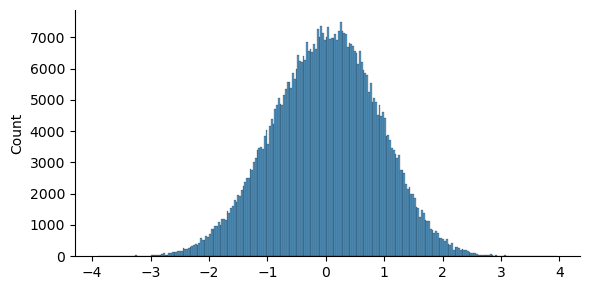

In [113]:
#distribuição dos resíduos
sns.displot(reg.resid, height=3, aspect=2);

> Resíduos com distribuição normal.  

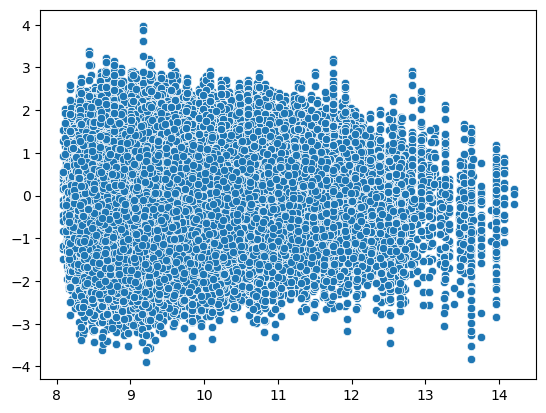

In [114]:
#resíduos versus os valores preditos
sns.scatterplot(x = reg.predict(), y = reg.resid);

> A variância parece dar uma leve diminuída, mas não há um padrão claro. 

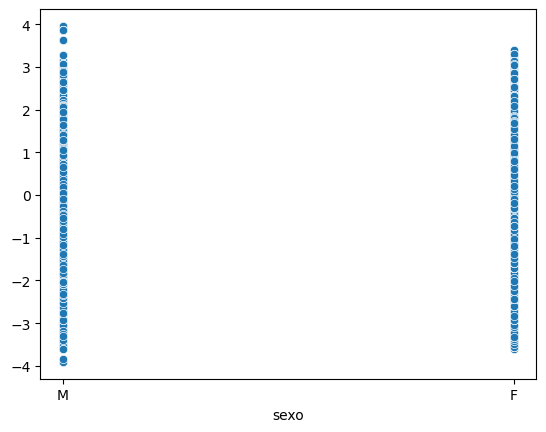

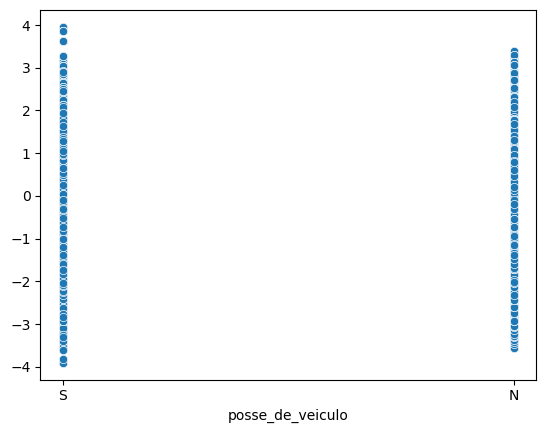

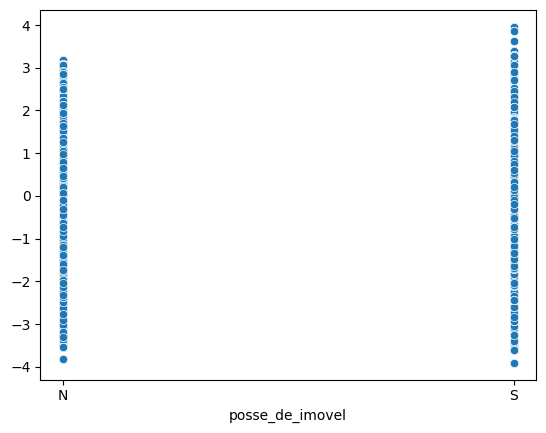

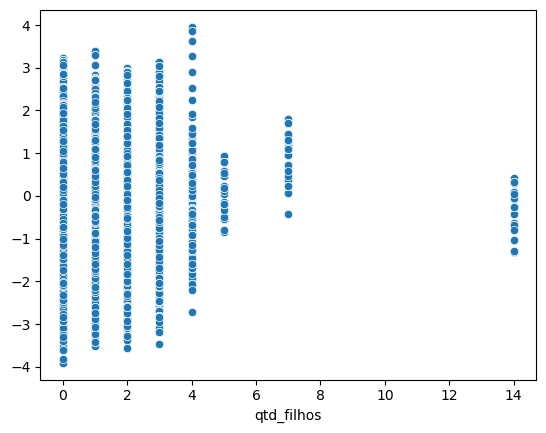

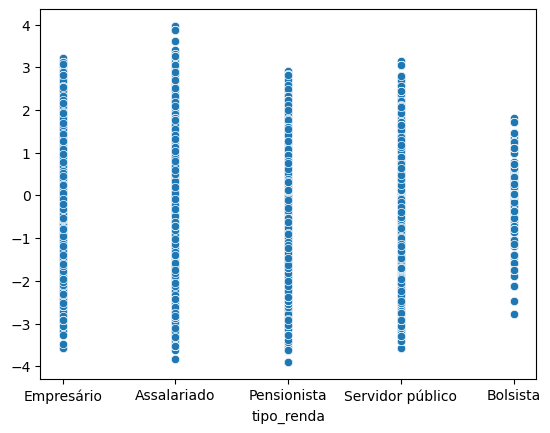

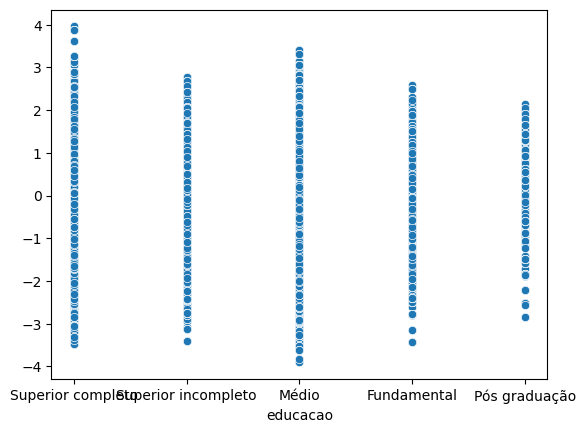

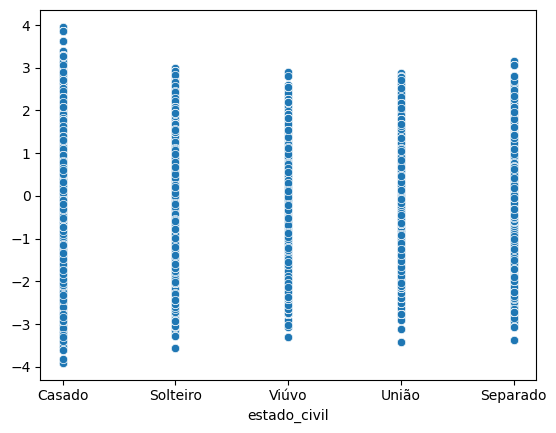

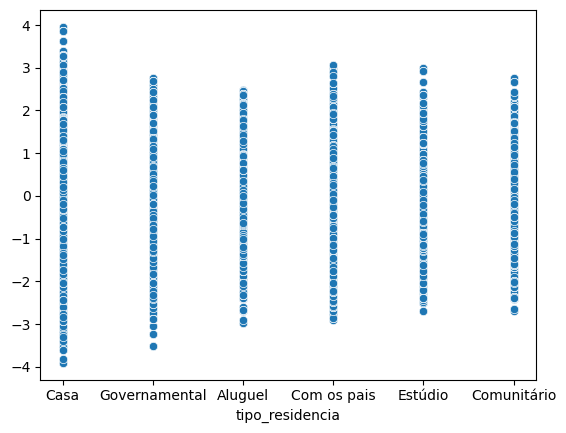

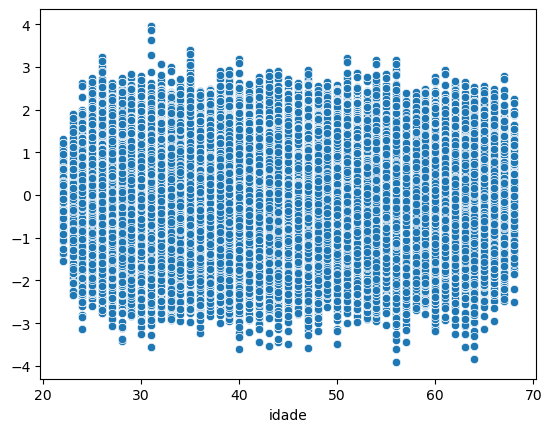

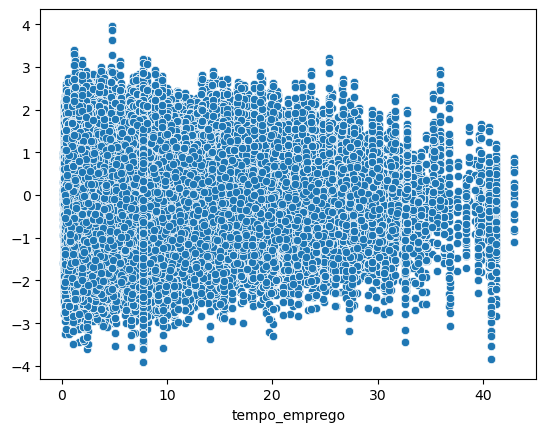

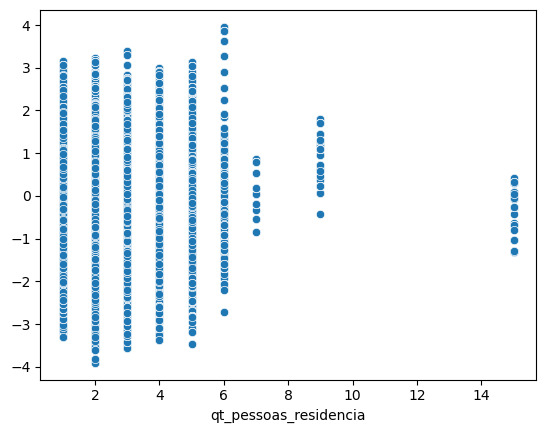

In [115]:
#padrões dos resíduos versus cada uma das variáveis do modelo

vars_modelo = ['sexo', 
               'posse_de_veiculo',
               'posse_de_imovel', 
               'qtd_filhos', 'tipo_renda', 
               'educacao',
               'estado_civil', 
               'tipo_residencia', 
               'idade', 
               'tempo_emprego',
               'qt_pessoas_residencia']

for var in vars_modelo:
    sns.scatterplot(x = base_treino[var], y = reg.resid);
    plt.show()

> Não parece haver padrões claros dos resíduos.

In [116]:
#incluindo a coluna com resíduos
base_treino['res'] = reg.resid

/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_50562/3684134845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_treino['res'] = reg.resid


In [117]:
#valor médio dos resíduos aparenta ter relação com o mês de referência
base_treino.groupby(pd.Grouper(key='data_ref', freq='M'))['res'].mean()

/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_50562/350181828.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  base_treino.groupby(pd.Grouper(key='data_ref', freq='M'))['res'].mean()


data_ref
2015-01-31   -1.026717
2015-02-28   -0.733910
2015-03-31   -0.384669
2015-04-30    0.001019
2015-05-31    0.348213
2015-06-30    0.603185
2015-07-31    0.690311
2015-08-31    0.602102
2015-09-30    0.324131
2015-10-31   -0.019517
2015-11-30   -0.404148
Freq: ME, Name: res, dtype: float64

> Há diferenças nos valores médios do resíduo, mas também não parece haver padrão. Alguns meses são parecidos, outros menos. 

> De maneira geral os resíduos não parecem apresentar padrões. Estão na distribuição normal e a variância da variável resposta parece ser conforme os valores previstos.

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

> Tentei executar os códigos abaixo utilizando a regressão feita inicialmente na base de treino, mas demorou muito (na verdade não executou, travou o kernel). Então fiz uma amostra do df apenas para conseguir mostrar a análise, mas sei que pode não ser exatamente representativa. 

In [118]:
df_sample = base_treino.sample(n=10000, random_state=42)

reg_sample = smf.ols('''log_renda ~ tempo_emprego
                           + sexo
                           + posse_de_veiculo
                           + posse_de_imovel
                           + qtd_filhos
                           + tipo_renda
                           + educacao
                           + estado_civil
                           + tipo_residencia
                           + idade
                           + qt_pessoas_residencia''', data=df_sample).fit()

reg_sample.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     324.3
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        16:56:08   Log-Likelihood:                -13146.
No. Observations:               10000   AIC:                         2.634e+04
Df Residuals:                    9975   BIC:                         2.652e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.6824      0.394     19.479      0.000       6.909       8.456
sexo[T.M]                            0.1388      0.021      6.486      0.000       0.097       0.181
posse_de_veiculo[T.S]                0.0387      0.020      1.908      0.056      -0.001       0.078
posse_de_imovel[T.S]                 0.1998      0.020     10.078      0.000       0.161       0.239
tipo_renda[T.Bolsista]              -0.3817      0.638     -0.598      0.550      -1.633       0.870
tipo_renda[T.Empresário]             0.1053      0.023      4.643      0.000       0.061       0.150
tipo_renda[T.Pensionista]           -0.2910      0.033     -8.889      0.000      -0.355      -0.227
tipo_renda[T.Servidor público]       0.1446      0.034      4.298      0.000       0.079       0.211
educacao[T.Médio]                   -0.0141      0.086     -0.164      0.870      -0.182       0.154
educacao[T.Pós graduação]            0.4575      0.331      1.384      0.167      -0.191       1.106
educacao[T.Superior completo]        0.1403      0.087      1.617      0.106      -0.030       0.310
educacao[T.Superior incompleto]      0.1085      0.097      1.123      0.262      -0.081       0.298
estado_civil[T.Separado]             0.2299      0.192      1.195      0.232      -0.147       0.607
estado_civil[T.Solteiro]             0.1648      0.189      0.870      0.384      -0.206       0.536
estado_civil[T.União]                0.0099      0.035      0.287      0.774      -0.058       0.078
estado_civil[T.Viúvo]                0.1735      0.194      0.892      0.372      -0.208       0.555
tipo_residencia[T.Casa]             -0.0805      0.071     -1.130      0.259      -0.220       0.059
tipo_residencia[T.Com os pais]      -0.0686      0.082     -0.835      0.404      -0.230       0.092
tipo_residencia[T.Comunitário]      -0.0043      0.139     -0.031      0.975      -0.277       0.268
tipo_residencia[T.Estúdio]           0.0240      0.133      0.180      0.857      -0.237       0.286
tipo_residencia[T.Governamental]    -0.1074      0.087     -1.236      0.217      -0.278       0.063
tempo_emprego                        0.1293      0.002     79.981      0.000       0.126       0.132
qtd_filhos                          -0.1720      0.189     -0.911      0.362      -0.542       0.198
idade                                0.0042      0.001      3.569      0.000       0.002       0.006
qt_pessoas_residencia                0.1607      0.188      0.853      0.394      -0.208       0.530
==============================================================================
Omnibus:                       30.205   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.160
Skew:             

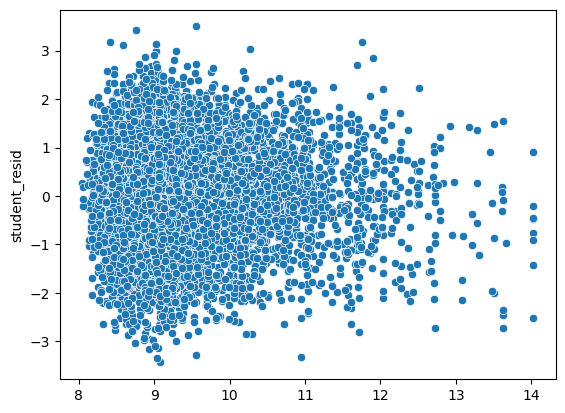

In [119]:
#studentized residuals
st_res = reg_sample.outlier_test()
sns.scatterplot(x = reg_sample.predict(), y = st_res.student_resid);

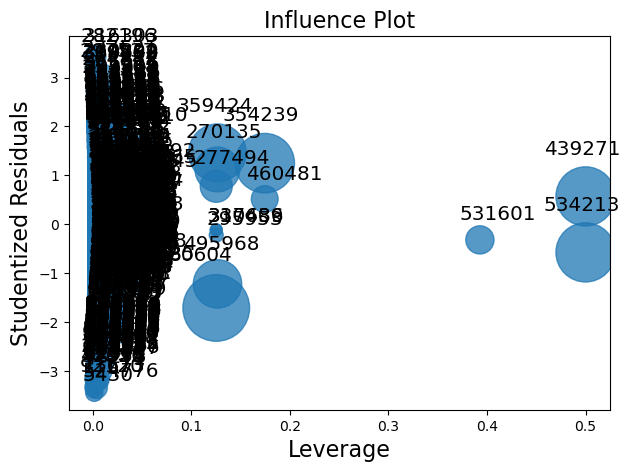

In [120]:
fig = sm.graphics.influence_plot(reg_sample, criterion="cooks")
fig.tight_layout(pad=1.0)

> Foi possível observar poucos pontos discrepantes nos resíduos, que poderiam ser outliers. O gráfico de pontos influentes mostrou ao menos três deles: 439271, 531601 e 534213.

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [121]:
#transformando variáveis qualitativas em dummies
base_dummies = pd.get_dummies(base_treino, drop_first=True)
base_dummies = base_dummies.drop(columns=['level_0', 
                                'data_ref', 
                                'index',
                                'renda', 
                                'log_renda',
                                'res'])

In [122]:
#Matriz de correlação de Spearman
cs = base_dummies.corr(method='spearman')

cs

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
qtd_filhos,1.000000,-0.415284,-0.090340,0.828468,0.119845,0.120534,-0.013382,-0.014659,0.037329,-0.266040,...,0.036690,-0.011444,-0.129425,0.011245,-0.110813,-0.043956,0.043235,-0.005955,0.035277,0.003182
idade,-0.415284,1.000000,0.301351,-0.350057,-0.215943,-0.166468,0.130264,0.015937,-0.177510,0.587338,...,-0.154085,0.057385,-0.069368,-0.056727,0.213666,0.155266,-0.190631,-0.017938,-0.007205,0.011259
tempo_emprego,-0.090340,0.301351,1.000000,-0.058409,-0.129242,-0.069272,0.014034,0.023763,-0.126350,0.153294,...,-0.058565,0.001260,-0.046886,-0.021466,0.050328,0.070032,-0.089200,-0.040960,0.023876,0.007150
qt_pessoas_residencia,0.828468,-0.350057,-0.058409,1.000000,0.159435,0.173836,-0.017109,-0.003982,0.026130,-0.238817,...,0.021381,-0.264092,-0.486123,0.093585,-0.305931,-0.020994,0.025739,-0.003339,0.029791,-0.002837
sexo_M,0.119845,-0.215943,-0.129242,0.159435,1.000000,0.367984,-0.056002,-0.015477,0.016613,-0.174832,...,0.018130,-0.063041,-0.034250,-0.024838,-0.138837,-0.061778,0.053188,0.020945,0.052957,-0.021722
posse_de_veiculo_S,0.120534,-0.166468,-0.069272,0.173836,0.367984,1.000000,-0.025008,-0.017736,0.050368,-0.149630,...,0.018131,-0.077258,-0.081728,-0.034013,-0.093826,-0.020930,0.021484,0.027555,0.031643,-0.019433
posse_de_imovel_S,-0.013382,0.130264,0.014034,-0.017109,-0.056002,-0.025008,1.000000,0.015533,-0.015763,0.097128,...,-0.045866,-0.016249,0.004310,-0.033269,0.039435,0.203334,-0.157766,-0.019223,-0.038594,-0.122461
tipo_renda_Bolsista,-0.014659,0.015937,0.023763,-0.003982,-0.015477,-0.017736,0.015533,1.000000,-0.012131,-0.009985,...,-0.004496,-0.005454,-0.008284,-0.006415,-0.004654,0.007455,-0.004792,-0.001470,-0.001892,-0.004000
tipo_renda_Empresário,0.037329,-0.177510,-0.126350,0.026130,0.016613,0.050368,-0.015763,-0.012131,1.000000,-0.245719,...,0.047596,0.008110,0.040214,0.034955,-0.075454,-0.005620,0.012388,-0.021487,0.006777,-0.003539
tipo_renda_Pensionista,-0.266040,0.587338,0.153294,-0.238817,-0.174832,-0.149630,0.097128,-0.009985,-0.245719,1.000000,...,-0.066736,-0.012965,-0.018198,-0.026935,0.204780,0.092064,-0.095426,-0.029772,-0.011196,-0.007332


In [123]:
corr_positiva = cs[(cs > 0.6) & (cs < 1)].stack().index.tolist()
corr_negativa = cs[(cs < - 0.6) & (cs > - 1)].stack().index.tolist()

print(f'''

Variáveis com correlação positiva: {corr_positiva} \n
Variáveis com correlação negativa: {corr_negativa}''')



Variáveis com correlação positiva: [('qtd_filhos', 'qt_pessoas_residencia'), ('qt_pessoas_residencia', 'qtd_filhos')] 

Variáveis com correlação negativa: [('educacao_Médio', 'educacao_Superior completo'), ('educacao_Superior completo', 'educacao_Médio'), ('tipo_residencia_Casa', 'tipo_residencia_Com os pais'), ('tipo_residencia_Com os pais', 'tipo_residencia_Casa')]


> Pela correlação de Spearman há pouca multicolinearidade evidente nas variáveis explicativas. Além disso, as variáveis mais correlacionadas (principalmente as negativamente) são dummies da mesma variável (o que faz sentido, uma vez que se uma cresce a outra diminui). 

In [124]:
base_dummies = base_dummies[['sexo_M', 
                            'posse_de_veiculo_S', 
                            'posse_de_imovel_S',
                            'tipo_renda_Bolsista', 
                            'tipo_renda_Empresário',
                            'tipo_renda_Pensionista', 
                            'tipo_renda_Servidor público',
                            'educacao_Médio', 
                            'educacao_Pós graduação',
                            'educacao_Superior completo', 
                            'educacao_Superior incompleto',
                            'estado_civil_Separado', 
                            'estado_civil_Solteiro', 
                            'estado_civil_União',
                            'estado_civil_Viúvo', 
                            'tipo_residencia_Casa',
                            'tipo_residencia_Com os pais', 
                            'tipo_residencia_Comunitário',
                            'tipo_residencia_Estúdio', 
                            'tipo_residencia_Governamental']].astype(int)


In [125]:
#vif

vif_data = pd.DataFrame()
vif_data["Variable"] = base_dummies.columns
vif_data["VIF"] = [vif(base_dummies.values, i) for i in range(base_dummies.shape[1])]

vif_data

,Variable,VIF
0,sexo_M,1.778279
1,posse_de_veiculo_S,1.959937
2,posse_de_imovel_S,3.180296
3,tipo_renda_Bolsista,1.003329
4,tipo_renda_Empresário,1.464697
5,tipo_renda_Pensionista,1.444546
6,tipo_renda_Servidor público,1.187390
7,educacao_Médio,26.518070
8,educacao_Pós graduação,1.047287
9,educacao_Superior completo,14.181539


As variáveis `educacao_Médio` e `tipo_residencia_Casa` apresentaram VIF maior que 20.

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [126]:
#retiando pontos influentes
base_treino = base_treino.drop(534213)
base_treino = base_treino.drop(439271)
base_treino = base_treino.drop(531601)

In [127]:
#modelo de regressão
reg_final = smf.ols('''log_renda ~ tempo_emprego
                                   + sexo
                                   + posse_de_imovel
                                   + qtd_filhos
                                   + tipo_renda
                                   + educacao
                                   + estado_civil
                                   + idade''', data=base_treino).fit()

reg_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                 2.579e+04
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        17:01:03   Log-Likelihood:            -7.2541e+05
No. Observations:              549997   AIC:                         1.451e+06
Df Residuals:                  549979   BIC:                         1.451e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           7.9168      0.013    588.277      0.000       7.890       7.943
sexo[T.M]                           0.1396      0.003     51.395      0.000       0.134       0.145
posse_de_imovel[T.S]                0.1825      0.003     69.398      0.000       0.177       0.188
tipo_renda[T.Bolsista]             -0.2169      0.055     -3.925      0.000      -0.325      -0.109
tipo_renda[T.Empresário]            0.1404      0.003     45.416      0.000       0.134       0.146
tipo_renda[T.Pensionista]          -0.2980      0.004    -67.644      0.000      -0.307      -0.289
tipo_renda[T.Servidor público]      0.1273      0.005     27.978      0.000       0.118       0.136
educacao[T.Médio]                   0.0281      0.012      2.433      0.015       0.005       0.051
educacao[T.Pós graduação]           0.1744      0.040      4.413      0.000       0.097       0.252
educacao[T.Superior completo]       0.1593      0.012     13.648      0.000       0.136       0.182
educacao[T.Superior incompleto]     0.0569      0.013      4.356      0.000       0.031       0.083
estado_civil[T.Separado]            0.0206      0.005      3.851      0.000       0.010       0.031
estado_civil[T.Solteiro]            0.0063      0.004      1.629      0.103      -0.001       0.014
estado_civil[T.União]               0.0097      0.005      2.083      0.037       0.001       0.019
estado_civil[T.Viúvo]               0.0114      0.006      1.802      0.072      -0.001       0.024
tempo_emprego                       0.1288      0.000    599.825      0.000       0.128       0.129
qtd_filhos                          0.0054      0.002      2.969      0.003       0.002       0.009
idade                               0.0043      0.000     27.004      0.000       0.004       0.005
==============================================================================
Omnibus:                     1193.973   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1159.200
Skew:                          -0.097   Prob(JB):                    1.92e-252
Kurtosis:                       2.885   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Foram retirados alguns pontos influentes e algumas variáveis, mas o R-quadrado permanece em 44%.

In [130]:
#verificando modelo na base de teste
y_pred = reg_final.predict(base_teste)
base_teste['pred'] = y_pred

r = base_teste[['pred', 'log_renda']].corr().iloc[0,1]
r2 = r**2

print(f'O R-quadrado na base de teste é: {r2:.2}')

O R-quadrado na base de teste é: 0.53


/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_50562/2240918893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_teste['pred'] = y_pred
